# 한국어 방언 (자연어) EDA

In [1]:
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
import urllib3
import ast

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

## 사용할 데이터 가져 오기

In [221]:
path='/Users/AlexYoung/Downloads/proj/proj_3/[라벨]경상도_학습데이터_1'
file_list=os.listdir(path)
file_list_py=[file for file in file_list if file.endswith('.json')]
file_list_py.sort()
#print(file_list_py)
DATA=file_list_py[0:10]
#len(DATA)
print(DATA)

['DKCI20000001.json', 'DKCI20000002.json', 'DKCI20000004.json', 'DKCI20000005.json', 'DKCI20000009.json', 'DKCI20000010.json', 'DKCI20000011.json', 'DKCI20000012.json', 'DKCI20000013.json', 'DKCI20000014.json']


In [222]:
Data=[]
for i in DATA:
    f=open(path +'/'+ i)
    Data.append(json.loads(f.read()))

In [223]:
Data #[0:10]
data=Data[9]
len(Data)
data['utterance'][-1]['dialect_form'] #방언
data['utterance'][-1]['standard_form'] #표준어

'아~ 나는 걔가 인스타 친구 돼 있거든.'

## 문장 리스트

In [150]:
dialect=[]
for x in range(len(Data)):
    data=Data[x]
    for y in range(len(data["utterance"])):
        dialect.append(data["utterance"][y]['dialect_form'])
dialect #방언


['자 음식을 멀 좋아하느냐 하면은',
 '나는 사실은 다 좋아합니다 다 좋아하는데 특히 육류 돼지고기',
 '아 자기 아 오리를 싫어했었구나',
 '머 못 묵 그라고 모든걸 다 좋아하는 데 즐기진 않는다.',
 '즐기진 않는다 자기는 나하고 반대네 나는',
 '야채를 좋아하거든.',
 '음~ 야채',
 '에피사이드 에피타이저',
 '머라노 그 곁들어 먹는',
 '곁들어먹는거 근데 야채를 많이 먹어야 건강해요.',
 '그 당연한거지.',
 '아니 왜 그렇냐면 내가 과학적으로 말해볼께.',
 '이 돼지고나 소고기 이런거 육류는',
 '사실은 장 우리 배에 있는 장에 먹이가 될 수가 없어.',
 '그러니깐 유익균 유익균 알제 좋은 유산균',
 '유익균에 유익균도 우리 배속에 있는 유익균이 있잖아.',
 '근데 먹이가 있어야지 얘네가 먹고 자랄꺼 아이가.',
 '자라거든 먹고 자라야되는데 근데 돼지고기나 소고기 이런거는 자기들의',
 '먹이가 될수 없데 근데 머가 얘들의 먹이는 머냐면 식이섬유',
 '그러니깐 인자 야채 과일 머 식이섬유 머 자기는 그런거 좋아하니깐',
 '근데 곁들어서 먹는게 중요하지.',
 '그래서 음식에 가린다는 것은 나는 한편으로 불행하다 생각합니다.',
 '아니 어쩔수 없이 먹는거 빼고 음식점 선 음식점 선택하기도 그렇고 같이 그 머 식사하러 가가지고',
 '나는 이거 안 먹는다 저거 안 먹는다 이라면 서로 또 민폐가 되기도 하고',
 '그래서 골고루 먹는 것은 참 중요하다고 생각이 되는데',
 '그러면 사실은 우리는 뭐 없어서 못 묵지.',
 '그러니깐',
 '자기는 자기는 특히 더 그렇고',
 '아무꺼나 뭐 다 감사하게 잘 먹는데 형부같은 경우가 쪼끔 문제가 되지 뭐',
 '밥을 챙겨먹는 생각도 의미 없다고 생각해.',
 '영양분이 되고 배가 부르면은 한 끼 식사로 충분하다.',
 '이런 주읜데 밥만을 주장하는 사람도 많드라 이거야.',
 '근데 나는 그기서 쪼끔 반대하는기 머냐면',
 '이 인제 밥이 탄수화물이잖아 탄수화물인데',
 '

In [79]:
# 표준어 문장 리스트
standard=[]
for x in range(len(Data)):
    data=Data[x]
    for y in range(len(data["utterance"])):
        standard.append(data["utterance"][y]['standard_form'])
standard #표준어


['자 음식을 멀 좋아하느냐 하면은',
 '나는 사실은 다 좋아합니다 다 좋아하는데 특히 육류 돼지고기',
 '아 자기 아 오리를 싫어했었구나',
 '머 못 먹 그리고 모든걸 다 좋아하는 데 즐기진 않는다.',
 '즐기진 않는다 자기는 나하고 반대네 나는',
 '야채를 좋아하거든.',
 '음~ 야채',
 '에피사이드 에피타이저',
 '머라노 그 곁들어 먹는',
 '곁들어먹는거 근데 야채를 많이 먹어야 건강해요.',
 '그 당연한거지.',
 '아니 왜 그렇냐면 내가 과학적으로 말해볼께.',
 '이 돼지고나 소고기 이런거 육류는',
 '사실은 장 우리 배에 있는 장에 먹이가 될 수가 없어.',
 '그러니깐 유익균 유익균 알제 좋은 유산균',
 '유익균에 유익균도 우리 배속에 있는 유익균이 있잖아.',
 '근데 먹이가 있어야지 얘네가 먹고 자랄꺼 아니야.',
 '자라거든 먹고 자라야되는데 근데 돼지고기나 소고기 이런거는 자기들의',
 '먹이가 될수 없데 근데 머가 얘들의 먹이는 무엇이냐면 식이섬유',
 '그러니깐 인제 야채 과일 머 식이섬유 머 자기는 그런거 좋아하니깐',
 '근데 곁들어서 먹는게 중요하지.',
 '그래서 음식에 가린다는 것은 나는 한편으로 불행하다 생각합니다.',
 '아니 어쩔수 없이 먹는거 빼고 음식점 선 음식점 선택하기도 그렇고 같이 그 머 식사하러 가서',
 '나는 이거 안 먹는다 저거 안 먹는다 이라면 서로 또 민폐가 되기도 하고',
 '그래서 골고루 먹는 것은 참 중요하다고 생각이 되는데',
 '그러면 사실은 우리는 뭐 없어서 못 먹지.',
 '그러니깐',
 '자기는 자기는 특히 더 그렇고',
 '아무거나 뭐 다 감사하게 잘 먹는데 형부같은 경우가 조금 문제가 되지 뭐',
 '밥을 챙겨먹는 생각도 의미 없다고 생각해.',
 '영양분이 되고 배가 부르면은 한 끼 식사로 충분하다.',
 '이런 주읜데 밥만을 주장하는 사람도 많더라 이거야.',
 '근데 나는 그기서 조금 반대하는기 머냐면',
 '이 인제 밥이 탄수화물이잖아 탄수화물인데',
 '

## 특정 문장 제외

In [80]:
new_dialect = ','.join(dialect)
#re.compile('[^ ㄱ-ㅣ가-힣+]').findall(string)
string=re.compile('[^, ㄱ-ㅣ가-힣+]').sub('',new_dialect)

In [81]:
# 특정 문장 제외(방언)
string

'자 음식을 멀 좋아하느냐 하면은,나는 사실은 다 좋아합니다 다 좋아하는데 특히 육류 돼지고기,아 자기 아 오리를 싫어했었구나,머 못 묵 그라고 모든걸 다 좋아하는 데 즐기진 않는다,즐기진 않는다 자기는 나하고 반대네 나는,야채를 좋아하거든,음 야채,에피사이드 에피타이저,머라노 그 곁들어 먹는,곁들어먹는거 근데 야채를 많이 먹어야 건강해요,그 당연한거지,아니 왜 그렇냐면 내가 과학적으로 말해볼께,이 돼지고나 소고기 이런거 육류는,사실은 장 우리 배에 있는 장에 먹이가 될 수가 없어,그러니깐 유익균 유익균 알제 좋은 유산균,유익균에 유익균도 우리 배속에 있는 유익균이 있잖아,근데 먹이가 있어야지 얘네가 먹고 자랄꺼 아이가,자라거든 먹고 자라야되는데 근데 돼지고기나 소고기 이런거는 자기들의,먹이가 될수 없데 근데 머가 얘들의 먹이는 머냐면 식이섬유,그러니깐 인자 야채 과일 머 식이섬유 머 자기는 그런거 좋아하니깐,근데 곁들어서 먹는게 중요하지,그래서 음식에 가린다는 것은 나는 한편으로 불행하다 생각합니다,아니 어쩔수 없이 먹는거 빼고 음식점 선 음식점 선택하기도 그렇고 같이 그 머 식사하러 가가지고,나는 이거 안 먹는다 저거 안 먹는다 이라면 서로 또 민폐가 되기도 하고,그래서 골고루 먹는 것은 참 중요하다고 생각이 되는데,그러면 사실은 우리는 뭐 없어서 못 묵지,그러니깐,자기는 자기는 특히 더 그렇고,아무꺼나 뭐 다 감사하게 잘 먹는데 형부같은 경우가 쪼끔 문제가 되지 뭐,밥을 챙겨먹는 생각도 의미 없다고 생각해,영양분이 되고 배가 부르면은 한 끼 식사로 충분하다,이런 주읜데 밥만을 주장하는 사람도 많드라 이거야,근데 나는 그기서 쪼끔 반대하는기 머냐면,이 인제 밥이 탄수화물이잖아 탄수화물인데,탄수화물은 아침에 꼭 섭취를 해야된데 아침에,아침에 자고 일어나서 공복 딱 왜 이거를 탄수화물을 먹야 되냐면,이거를 먹어야 이게 인제 에너지원이 되어가지고,이게 머리 두뇌 두뇌를 그런데 고기나 이런건 안 된대,전부 다 지방으로 바뀐다매,아 지방으로 바뀌는게 아니고 탄수화물

In [82]:
# 특정 문장 제외(표준어)
new_standard = ','.join(standard)
string_=re.compile('[^, ㄱ-ㅣ가-힣+]').sub('',new_standard)

In [83]:
dialects=string.split(',')
standards=string_.split(',')

In [84]:
# 특정문장 제외한 문장(방언, 표준어)
df=pd.DataFrame({'dialect':dialects, 'standard':standards})
df

,dialect,standard
0,자 음식을 멀 좋아하느냐 하면은,자 음식을 멀 좋아하느냐 하면은
1,나는 사실은 다 좋아합니다 다 좋아하는데 특히 육류 돼지고기,나는 사실은 다 좋아합니다 다 좋아하는데 특히 육류 돼지고기
2,아 자기 아 오리를 싫어했었구나,아 자기 아 오리를 싫어했었구나
3,머 못 묵 그라고 모든걸 다 좋아하는 데 즐기진 않는다,머 못 먹 그리고 모든걸 다 좋아하는 데 즐기진 않는다
4,즐기진 않는다 자기는 나하고 반대네 나는,즐기진 않는다 자기는 나하고 반대네 나는
...,...,...
2811,어 그래서 그냥 근로 단톡방에 이제 나랑 이 세 명이서 얘기하고,어 그래서 그냥 근로 단톡방에 이제 나랑 이 세 명이서 얘기하고
2812,아 걔도 근로야,아 걔도 근로야
2813,어어 그 세 명이다,어어 그 세 명이다
2814,아 대박,아 대박


## 글자 길이에 대한 시각화

### 히스토그램

Text(0, 0.5, '빈도 수')

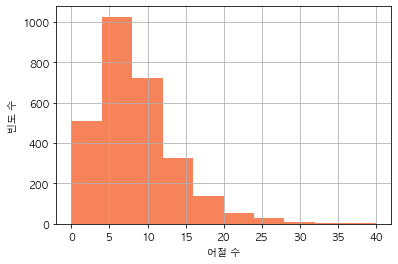

In [232]:
#글자수 히스토그램
ax = df['dialect'].str.split().map(lambda x: len(x)).hist(color='#f7835aff')
ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')


Text(0, 0.5, '빈도 수')

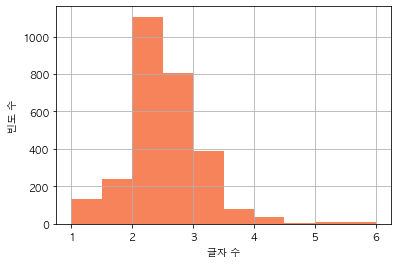

In [242]:
# 띄어쓰기로 나눈 글자 빈도수
ax = df['dialect'].str.split().\
   apply(lambda x : [len(i) for i in x]).\
   map(lambda x: np.mean(x)).hist(color='#f7835aff')

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')


In [86]:
# 방언(dia)
dialect=df['dialect'].to_list()
dia=[]

for i in dialect:
    dia.append(i.split(' '))
dia #문장을 어절단위로 나눈 리스트(리스트 안의 리스트)

[['자', '음식을', '멀', '좋아하느냐', '하면은'],
 ['나는', '사실은', '다', '좋아합니다', '다', '좋아하는데', '특히', '육류', '돼지고기'],
 ['아', '자기', '아', '오리를', '싫어했었구나'],
 ['머', '못', '묵', '그라고', '모든걸', '다', '좋아하는', '데', '즐기진', '않는다'],
 ['즐기진', '않는다', '자기는', '나하고', '반대네', '나는'],
 ['야채를', '좋아하거든'],
 ['음', '야채'],
 ['에피사이드', '에피타이저'],
 ['머라노', '그', '곁들어', '먹는'],
 ['곁들어먹는거', '근데', '야채를', '많이', '먹어야', '건강해요'],
 ['그', '당연한거지'],
 ['아니', '왜', '그렇냐면', '내가', '과학적으로', '말해볼께'],
 ['이', '돼지고나', '소고기', '이런거', '육류는'],
 ['사실은', '장', '우리', '배에', '있는', '장에', '먹이가', '될', '수가', '없어'],
 ['그러니깐', '유익균', '유익균', '알제', '좋은', '유산균'],
 ['유익균에', '유익균도', '우리', '배속에', '있는', '유익균이', '있잖아'],
 ['근데', '먹이가', '있어야지', '얘네가', '먹고', '자랄꺼', '아이가'],
 ['자라거든', '먹고', '자라야되는데', '근데', '돼지고기나', '소고기', '이런거는', '자기들의'],
 ['먹이가', '될수', '없데', '근데', '머가', '얘들의', '먹이는', '머냐면', '식이섬유'],
 ['그러니깐', '인자', '야채', '과일', '머', '식이섬유', '머', '자기는', '그런거', '좋아하니깐'],
 ['근데', '곁들어서', '먹는게', '중요하지'],
 ['그래서', '음식에', '가린다는', '것은', '나는', '한편으로', '불행하다', '생각합니다'],
 ['아니',
  '어쩔수',
  '없이',


In [87]:
# 표준어(sta)
standard=df['standard'].to_list()
sta=[]

for i in standard:
    sta.append(i.split(' '))

In [88]:
# 방언(strings)
strings=string.split(' ')
strings #어절별로 나눈 리스트(리스트)

['자',
 '음식을',
 '멀',
 '좋아하느냐',
 '하면은,나는',
 '사실은',
 '다',
 '좋아합니다',
 '다',
 '좋아하는데',
 '특히',
 '육류',
 '돼지고기,아',
 '자기',
 '아',
 '오리를',
 '싫어했었구나,머',
 '못',
 '묵',
 '그라고',
 '모든걸',
 '다',
 '좋아하는',
 '데',
 '즐기진',
 '않는다,즐기진',
 '않는다',
 '자기는',
 '나하고',
 '반대네',
 '나는,야채를',
 '좋아하거든,음',
 '야채,에피사이드',
 '에피타이저,머라노',
 '그',
 '곁들어',
 '먹는,곁들어먹는거',
 '근데',
 '야채를',
 '많이',
 '먹어야',
 '건강해요,그',
 '당연한거지,아니',
 '왜',
 '그렇냐면',
 '내가',
 '과학적으로',
 '말해볼께,이',
 '돼지고나',
 '소고기',
 '이런거',
 '육류는,사실은',
 '장',
 '우리',
 '배에',
 '있는',
 '장에',
 '먹이가',
 '될',
 '수가',
 '없어,그러니깐',
 '유익균',
 '유익균',
 '알제',
 '좋은',
 '유산균,유익균에',
 '유익균도',
 '우리',
 '배속에',
 '있는',
 '유익균이',
 '있잖아,근데',
 '먹이가',
 '있어야지',
 '얘네가',
 '먹고',
 '자랄꺼',
 '아이가,자라거든',
 '먹고',
 '자라야되는데',
 '근데',
 '돼지고기나',
 '소고기',
 '이런거는',
 '자기들의,먹이가',
 '될수',
 '없데',
 '근데',
 '머가',
 '얘들의',
 '먹이는',
 '머냐면',
 '식이섬유,그러니깐',
 '인자',
 '야채',
 '과일',
 '머',
 '식이섬유',
 '머',
 '자기는',
 '그런거',
 '좋아하니깐,근데',
 '곁들어서',
 '먹는게',
 '중요하지,그래서',
 '음식에',
 '가린다는',
 '것은',
 '나는',
 '한편으로',
 '불행하다',
 '생각합니다,아니',
 '어쩔수',
 '없이',
 '먹는거',
 '빼고',
 '음식점',
 

In [89]:
#표준어(strings_)
strings_=string.split(' ')

### 어절별 빈도수

Text(0.5, 1.0, '어절별 빈도수')

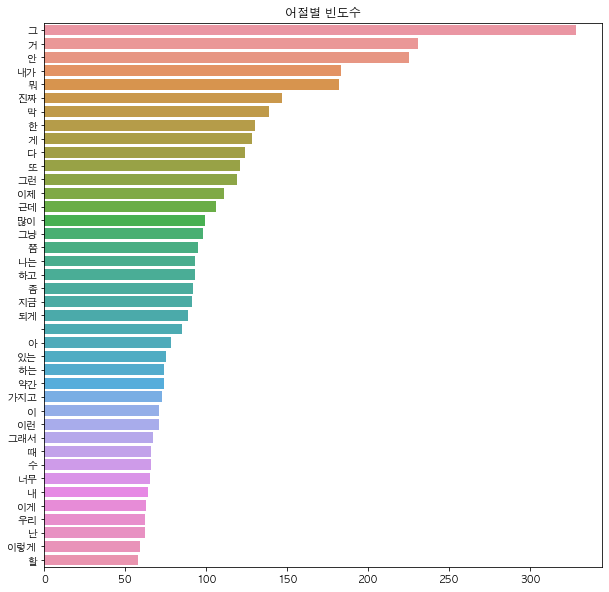

In [90]:
#어절별 빈도수
count=collections.Counter(strings)
most=count.most_common()

x,y=[],[]
for word, count in most[:40]:
    x.append(word)
    y.append(count)

#plt.rcParams['font.family']='NanumGothic'    
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.title('어절별 빈도수')

In [103]:
# 2글자 이상
strings2=[]
for i in strings:
    if len(i)>2:
        strings2.append(i)

In [104]:
strings2

['음식을',
 '좋아하느냐',
 '하면은,나는',
 '사실은',
 '좋아합니다',
 '좋아하는데',
 '돼지고기,아',
 '오리를',
 '싫어했었구나,머',
 '그라고',
 '모든걸',
 '좋아하는',
 '즐기진',
 '않는다,즐기진',
 '않는다',
 '자기는',
 '나하고',
 '반대네',
 '나는,야채를',
 '좋아하거든,음',
 '야채,에피사이드',
 '에피타이저,머라노',
 '곁들어',
 '먹는,곁들어먹는거',
 '야채를',
 '먹어야',
 '건강해요,그',
 '당연한거지,아니',
 '그렇냐면',
 '과학적으로',
 '말해볼께,이',
 '돼지고나',
 '소고기',
 '이런거',
 '육류는,사실은',
 '먹이가',
 '없어,그러니깐',
 '유익균',
 '유익균',
 '유산균,유익균에',
 '유익균도',
 '배속에',
 '유익균이',
 '있잖아,근데',
 '먹이가',
 '있어야지',
 '얘네가',
 '자랄꺼',
 '아이가,자라거든',
 '자라야되는데',
 '돼지고기나',
 '소고기',
 '이런거는',
 '자기들의,먹이가',
 '얘들의',
 '먹이는',
 '머냐면',
 '식이섬유,그러니깐',
 '식이섬유',
 '자기는',
 '그런거',
 '좋아하니깐,근데',
 '곁들어서',
 '먹는게',
 '중요하지,그래서',
 '음식에',
 '가린다는',
 '한편으로',
 '불행하다',
 '생각합니다,아니',
 '어쩔수',
 '먹는거',
 '음식점',
 '음식점',
 '선택하기도',
 '그렇고',
 '식사하러',
 '가가지고,나는',
 '먹는다',
 '먹는다',
 '이라면',
 '민폐가',
 '되기도',
 '하고,그래서',
 '골고루',
 '중요하다고',
 '생각이',
 '되는데,그러면',
 '사실은',
 '우리는',
 '없어서',
 '묵지,그러니깐,자기는',
 '자기는',
 '그렇고,아무꺼나',
 '감사하게',
 '먹는데',
 '형부같은',
 '경우가',
 '문제가',
 '뭐,밥을',
 '챙겨먹는',
 '생각도',
 '없다고',
 '생각해,영양분이',
 '부르면은',

Text(0.5, 1.0, '어절별 빈도수 (2글자 이상)')

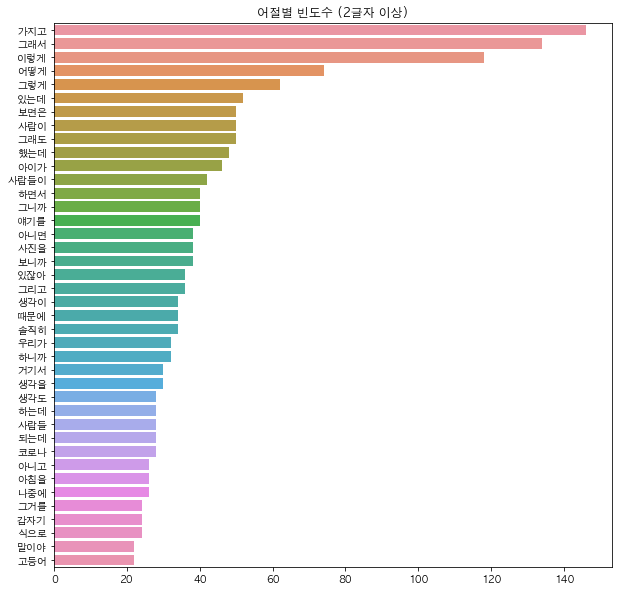

In [244]:
# 어절별 빈도수(2글자 이상)
count=collections.Counter(strings2)
most=count.most_common()

x,y=[],[]
for word, count in most[:40]:
    x.append(word)
    y.append(count)

#plt.rcParams['font.family']='NanumGothic'    
plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.title('어절별 빈도수 (2글자 이상)')


### 문장길이 시각화

In [110]:
#문장길이 데이터
df_length = df['dialect'].apply(len)
df_length.head()

0    17
1    33
2    17
3    30
4    22
Name: dialect, dtype: int64

Text(0, 0.5, '누적값')

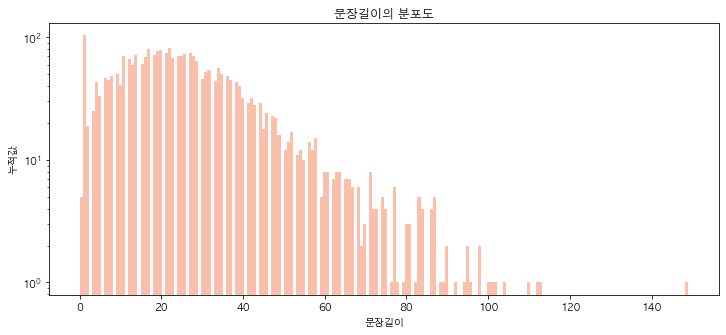

In [111]:
#문장길이의 분포도
plt.figure(figsize=(12,5))
plt.hist(df_length, bins=200, alpha=0.5, color='#f7835aff', label='word')
plt.yscale('log', nonposy='clip')
plt.title('문장길이의 분포도')
plt.xlabel('문장길이')
plt.ylabel('누적값')


### 문장길이 boxplot

In [112]:
# 문장길이 관련 통계값
print('문장 길이 최대값 : {}'.format(np.max(df_length)))
print('문장 길이 최소값 : {}'.format(np.min(df_length)))
print('문장 길이 평균값 : {:.2f}'.format(np.mean(df_length)))
print('문장 길이 표준편차 : {:.2f}'.format(np.std(df_length)))
print('문장 길이 중간값 : {}'.format(np.median(df_length)))

print('문장 길이 제1사분위 : {}'.format(np.percentile(df_length, 25)))
print('문장 길이 제3사분위 : {}'.format(np.percentile(df_length, 75)))

문장 길이 최대값 : 149
문장 길이 최소값 : 0
문장 길이 평균값 : 26.56
문장 길이 표준편차 : 17.70
문장 길이 중간값 : 24.0
문장 길이 제1사분위 : 14.0
문장 길이 제3사분위 : 35.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9b8865970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9b8874520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9b88552b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9b8884a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9b88a2d90>],
 'means': [<matplotlib.lines.Line2D at 0x7fb9b88921f0>]}

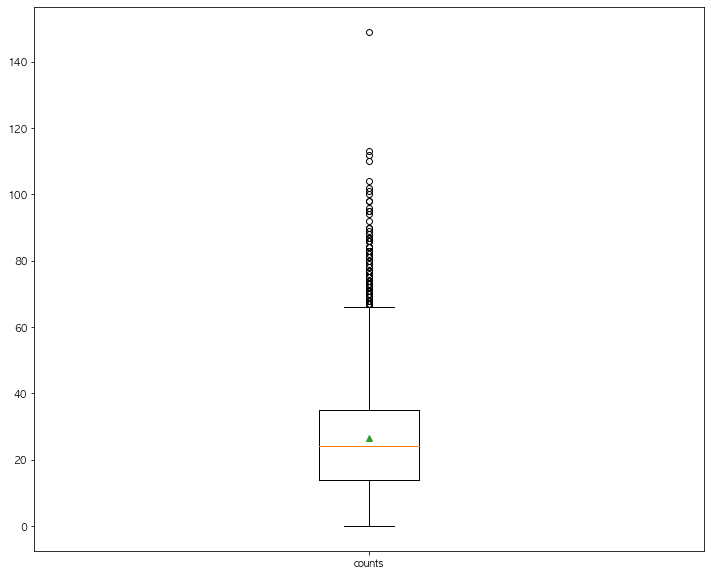

In [113]:
# 문장길이에 대한 시각화(박스플롯)
plt.figure(figsize=(12,10))
plt.boxplot(df_length, labels=['counts'], showmeans=True)
#plt.grid(color='#f7835aff')

## ETRI 형태소 분석을 이용한 문장 분석

In [115]:
# 100문장 사용
Dialect=dialect[:100]

In [116]:
#etri 형태소 분석 API를 이용한 문장 분석

openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"

#"7f039a3d-31ea-40ec-938e-4bbfbb0fbc16"
#"bd6d2bff-4e44-4035-8591-947fda262051"
#"aba3a45d-3318-4061-8a5d-799c8521b082"

accessKey = "bd6d2bff-4e44-4035-8591-947fda262051"
analysisCode = "morp"

lem=[]
typ=[]
for i in Dialect:
    text=i
    
    requestJson = {
        "access_key": accessKey,
        "argument": {
            "text": text,
            "analysis_code": analysisCode
        }
    }

    http = urllib3.PoolManager()
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(requestJson)
    )

    tmp = ast.literal_eval(response.data.decode('utf-8'))
    #print(tmp["return_object"]["sentence"][0])
    Tmp=tmp["return_object"]["sentence"][0]['morp']

    for x in Tmp:
            lem.append(x.get('lemma'))
            typ.append(x.get('type'))


In [117]:
# 데이터프레임
TMP=pd.DataFrame({'lemma':lem, 'type':typ})
TMP

,lemma,type
0,자,IC
1,음식,NNG
2,을,JKO
3,멀,MAG
4,좋아하,VV
...,...,...
1610,면,EC
1611,시체,NNG
1612,다,XSA
1613,아이,NNG


In [118]:
# key,value 뒤집기
words=TMP['lemma'].to_dict()
word={v:k for k,v in words.items()}
word

{'자': 1494,
 '음식': 1566,
 '을': 1484,
 '멀': 1153,
 '좋아하': 1561,
 '느냐': 5,
 '하': 1568,
 '면': 1610,
 '은': 1605,
 '나': 1596,
 '는': 1607,
 '사실': 1604,
 '다': 1612,
 'ㅂ니다': 248,
 '는데': 1475,
 '특히': 334,
 '육류': 115,
 '돼지': 178,
 '고기': 486,
 '아': 1531,
 '자기': 1595,
 '오리': 26,
 '를': 1554,
 '싫어하': 28,
 '었었': 1298,
 '구나': 1366,
 '머': 1594,
 '못': 1271,
 '묵': 1525,
 '그': 1600,
 '이': 1578,
 '라고': 1601,
 '모든': 37,
 '것': 1608,
 'ㄹ': 1407,
 '데': 195,
 '즐기': 49,
 '지': 1530,
 'ㄴ': 1473,
 '않': 1077,
 '는다': 290,
 '하고': 57,
 '반대': 413,
 '네': 1509,
 '야채': 653,
 '거든': 1414,
 '음': 66,
 '에피사이드': 68,
 '에피타이저': 69,
 '머라노': 70,
 '곁들': 223,
 '어': 1598,
 '먹': 1606,
 '곁들어먹': 76,
 '근데': 1111,
 '많이': 1477,
 '어야': 1491,
 '건강': 1116,
 '어요': 1480,
 '당연하': 89,
 '아니': 1529,
 '왜': 1257,
 '그렇': 1297,
 '냐면': 899,
 '내': 1551,
 '가': 1614,
 '과학': 100,
 '적': 1301,
 '으로': 1252,
 '말': 1390,
 '보': 1555,
 'ㄹ께': 107,
 '돼지고': 109,
 '소': 537,
 '이런': 657,
 '장': 125,
 '우리': 1602,
 '배': 379,
 '에': 1435,
 '있': 1440,
 '먹이': 202,
 '되': 1575,
 '

### 워드 클라우드

In [119]:
#워드 클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/Library/Fonts/AppleGothic.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(word)

<class 'numpy.ndarray'>
(800, 800, 3)


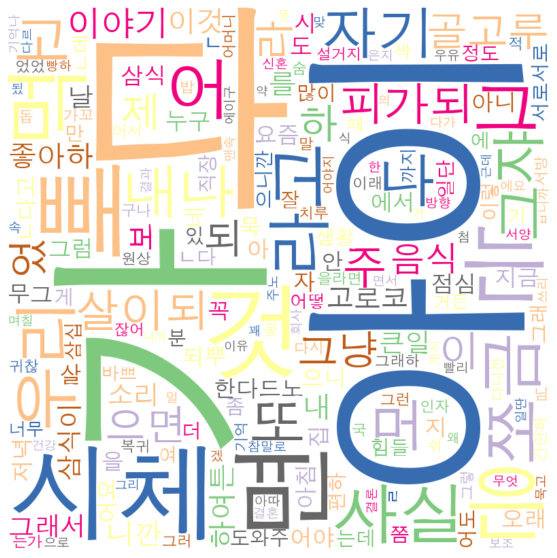

In [120]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')

## 방언, 표준어 사전

In [228]:
# 방언, 표준어 사전
Dia=[] #방언
Sta=[] #표준어

for x in range(len(data['utterance'])):
    eojeol=data['utterance'][x]
    
    for y in range(len(eojeol['eojeolList'])):
        if eojeol['eojeolList'][y]['isDialect'] == True:
            try:
                dial = eojeol['eojeolList'][y]['eojeol']
                stan = eojeol['eojeolList'][y]['standard']
                
                Dia.append(dial)
                Sta.append(stan)
            
            except:
                pass

df2=pd.DataFrame({'dialect':Dia, 'standard':Sta})


In [229]:
df2

,dialect,standard
0,맞재,맞지
1,거라.,거야.
2,거다,거지
3,아이가.,않냐.
4,따른,다른
5,쫌,조금
6,쫌,조금
7,거다,거지
8,아이가.,않냐.
9,기다릴라면,기다리려면


In [234]:
# 뒤집기(방언)
Words=df2['dialect'].to_dict()
Word={v:k for k,v in Words.items()}
Word

{'맞재': 0,
 '거라.': 1,
 '거다': 7,
 '아이가.': 29,
 '따른': 35,
 '쫌': 31,
 '기다릴라면': 9,
 '꺼가?': 10,
 '추천합니데이.': 11,
 '카톡이': 14,
 '니한테': 15,
 '들어봤나?': 17,
 '있었다': 20,
 '그기가': 22,
 '공기업이다': 23,
 '아나?': 25,
 '니는': 26,
 '않는다': 28,
 '니': 33,
 '아이다': 34,
 '그기': 36,
 '있다': 37,
 '아이가': 38}

### 워드 클라우드(방언)

In [235]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/Library/Fonts/AppleGothic.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(Word)

<class 'numpy.ndarray'>
(800, 800, 3)


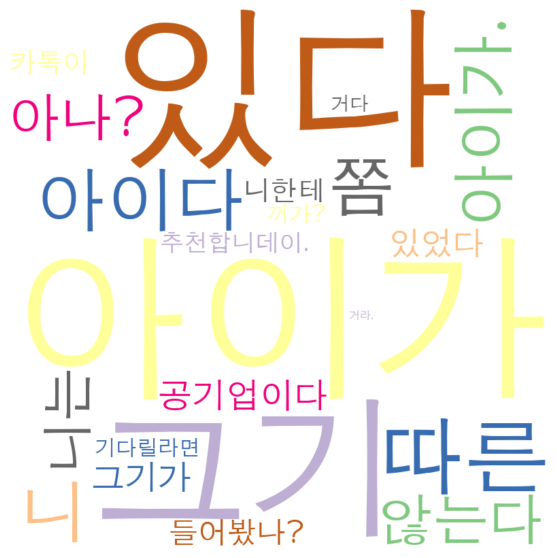

In [236]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')

In [238]:
# 뒤집기(표준어)
Words_=df2['standard'].to_dict()
Word_={v:k for k,v in Words_.items()}
Word_

{'맞지': 0,
 '거야.': 1,
 '거지': 7,
 '않냐.': 29,
 '다른': 35,
 '조금': 31,
 '기다리려면': 9,
 '거야?': 10,
 '추천합니다.': 11,
 '카카오톡이': 14,
 '너한테': 15,
 '들어봤어?': 17,
 '있었지': 20,
 '거기가': 22,
 '공기업이지': 23,
 '알아?': 25,
 '너는': 26,
 '않지': 28,
 '너': 33,
 '아니다': 34,
 '거기': 36,
 '있지': 37,
 '않냐': 38}

### 워드 클라우드(표준어)

In [239]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = '/Library/Fonts/AppleGothic.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(Word_)

<class 'numpy.ndarray'>
(800, 800, 3)


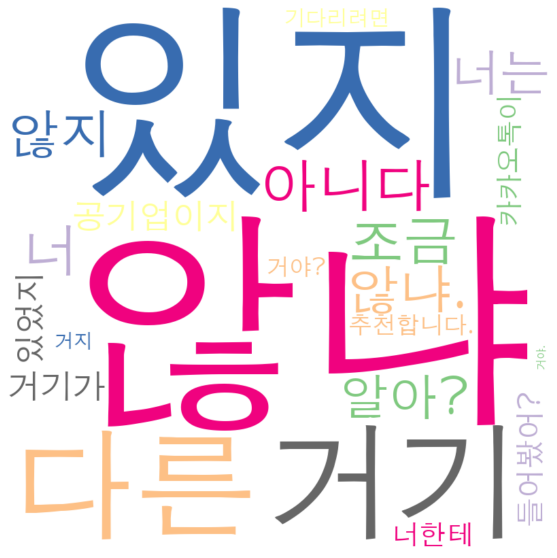

In [240]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')